In [198]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import seaborn as sns

import numpy as np
import pandas as pd



# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier


In [199]:
# Get the data for model and text 
df_model= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='Model')

#print(df_model)

df_test= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='test_1_3_16_21')
#print(df_test)

# ['skew_rr', 'mean_acc', 'mean_gra', 'std_gra', 'gender']
# ['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender']

# set the X (as features for model) and y (target data - task information )
X_modelData = pd.DataFrame(df_model,columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender'])
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 12 is ststionary and 3456 moving. 
y_4group_model=df_model.activity_group_4

X_testData = pd.DataFrame(df_test,columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender'])
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no
y_4group_test=df_test.activity_group_4
# preprocessing of the all the data is performed 

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler            # seams standscalar is doing better
std_scaler = StandardScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)                          

X_testData_scaled= std_scaler.fit_transform(X_testData)                          # check the heading of the test data 
 
data_features=columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender']


# Different target labels that can be used as needed to test different conditions 

In [200]:
# Data for modelling 
X=X_modelData_scaled  #
y=y_model
y_4group_model=df_model.activity_group_4

# data for prediction/testing
y_test=y_test
X_test=X_testData_scaled
y_4group_test=df_test.activity_group_4

# Classifiers from 9 features is done 

In [201]:
# Using data without PCA 

Model= X_modelData_scaled
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 12 is ststionary and 3456 moving. 



test = X_testData_scaled
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no


# RandomForestClassifier ( Stationary or moving)

In [202]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train=Model
y_train=ynew_model
X_test=test
y_test=ynew_test

print(X_train)
print(y_train)
print(y_test)
print(X_test)




[[ 1.93286906 -0.76595697  1.83605524 ... -0.50995185 -1.25849223
  -1.18597368]
 [ 2.14855678 -0.6410469   1.75632049 ... -0.66114755 -1.25849223
  -1.18597368]
 [ 2.08669801 -0.77433045  1.80338066 ... -0.35147018 -1.25849223
  -1.18597368]
 ...
 [ 0.82666378 -0.69757802  0.87016231 ... -0.22744235  1.86113518
   0.84318903]
 [ 0.83301714 -0.87950547  0.88571281 ... -0.34399689  1.86113518
   0.84318903]
 [ 0.8974452  -0.85185394  0.96279357 ...  0.08615649  1.86113518
   0.84318903]]
0       3456
1       3456
2       3456
3       3456
4       3456
        ... 
1321    3456
1322    3456
1323    3456
1324    3456
1325    3456
Name: stationay_yes_no, Length: 1326, dtype: int64
0      3456
1      3456
2      3456
3      3456
4      3456
       ... 
295    3456
296    3456
297    3456
298    3456
299    3456
Name: stationay_yes_no, Length: 300, dtype: int64
[[ 2.26645706 -1.08987638  2.76804014 ... -0.8417669   1.69726628
   1.00668904]
 [ 2.67206237 -0.75326295  2.86199481 ... -0.840508

Accuracy: 1.0


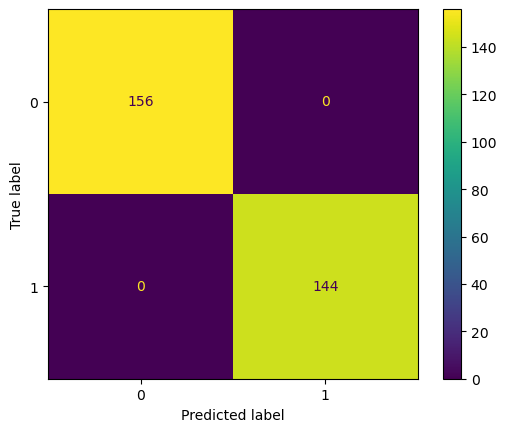

In [203]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
rf_2option = RandomForestClassifier()
rf_2option.fit(X_train, y_train)

y_pred = rf_2option.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();



# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# RandomForestClassifier ( Multiclass with all activities)


In [204]:
Model= X_modelData_scaled
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 0 is ststionary and 1 moving. 



test = X_testData_scaled
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no


y_4group_model=df_model.activity_group_4
y_4group_test=df_test.activity_group_4


# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train=Model
y_train=y_model
X_test=test
y_test=y_test

print(X_train)
print(y_train)
print(y_test)
print(X_test)


[[ 1.93286906 -0.76595697  1.83605524 ... -0.50995185 -1.25849223
  -1.18597368]
 [ 2.14855678 -0.6410469   1.75632049 ... -0.66114755 -1.25849223
  -1.18597368]
 [ 2.08669801 -0.77433045  1.80338066 ... -0.35147018 -1.25849223
  -1.18597368]
 ...
 [ 0.82666378 -0.69757802  0.87016231 ... -0.22744235  1.86113518
   0.84318903]
 [ 0.83301714 -0.87950547  0.88571281 ... -0.34399689  1.86113518
   0.84318903]
 [ 0.8974452  -0.85185394  0.96279357 ...  0.08615649  1.86113518
   0.84318903]]
0       6
1       6
2       6
3       6
4       6
       ..
1321    3
1322    3
1323    3
1324    3
1325    3
Name: task_info, Length: 1326, dtype: int64
0      6
1      6
2      6
3      6
4      6
      ..
295    3
296    3
297    3
298    3
299    3
Name: task_info, Length: 300, dtype: int64
[[ 2.26645706 -1.08987638  2.76804014 ... -0.8417669   1.69726628
   1.00668904]
 [ 2.67206237 -0.75326295  2.86199481 ... -0.8405083   1.69726628
   1.00668904]
 [ 2.34665986 -0.93138908  2.7823927  ... -0.84693

In [205]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 0.78


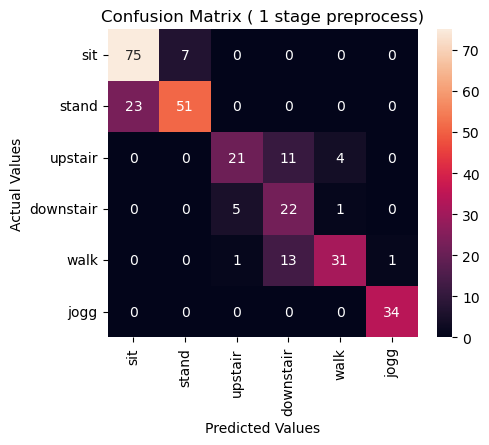

In [206]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
    
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm, index = ['sit','stand','upstair','downstair','walk','jogg'], columns = ['sit','stand','upstair','downstair','walk','jogg'])
# 1.sit 2. stand 3. upstair 4. downstair 5. walk 6. Jogg

#cm_df = pd.DataFrame(cm, index = ['sit & stand','up & down stair','walk','jogg'], columns = ['sit & stand','up & down stair','walk','jogg'])
# 1.2 .sit + stand 3.4 upstair downstair 5. walk 6. Jogg

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix ( 1 stage preprocess)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



# PCA & Random Forest

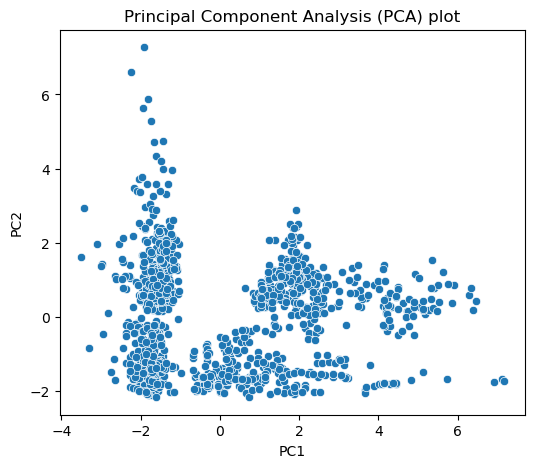

[1, 2, 3, 4, 5, 6]


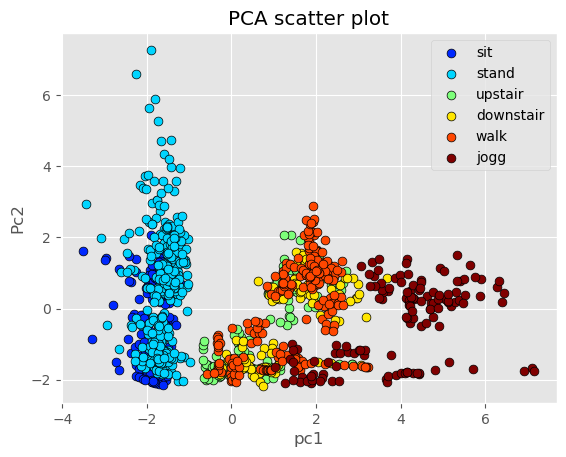

cum_sum_eigenvalues [ 46.74  67.75  85.52  92.89  96.34  98.54  99.64  99.91 100.02]


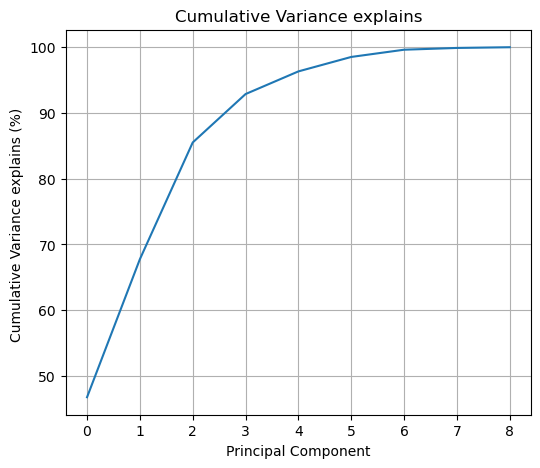

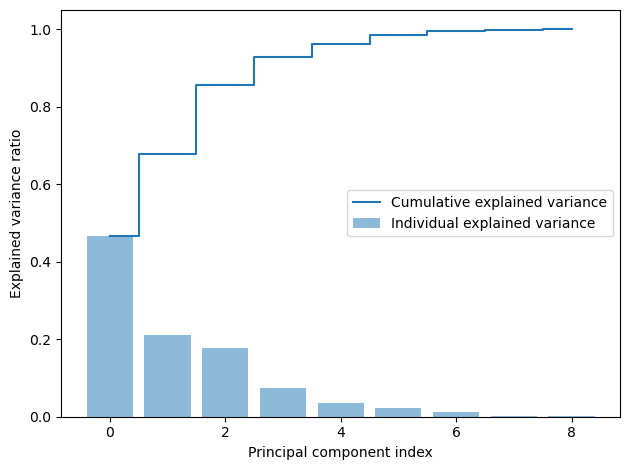

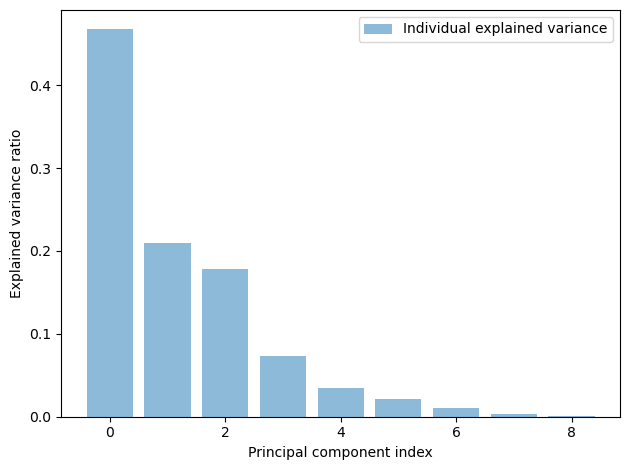

In [207]:
# perform pca for the data 

# referance 1 : https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ 
# referance 2 : https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# Referance 3 : https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

from sklearn.decomposition import PCA

pca = PCA(n_components=9)   # n = number of features 
pca_score = pca.fit_transform(X_modelData_scaled)

pc1_Modelvalues = pca_score[:,0]
pc2_Modelvalues = pca_score[:,1]
pc3_Modelvalues = pca_score[:,2]

plt.figure(figsize=(6,5))
sns.scatterplot(x=pc1_Modelvalues, y=pc2_Modelvalues)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA) plot')
plt.show()


taskinfo =df_model.task_info


# Extract DayNumbers and setting its Legend for ploting 
 
unique_taskinfo = list(set(taskinfo))
print(unique_taskinfo)
#  1.sit 2. stand 3. upstair 4. downstair 5. walk 6. jogg
taskinfoplot=["sit","stand","upstair","downstair","walk","jogg"]   # [1, 2, 3, 4, 5, 6]

# 2D Scatter plot of Raw data using Day No 
colors = [plt.cm.jet(float(i)/max(unique_taskinfo)) for i in unique_taskinfo]


with plt.style.context(('ggplot')):
    for i, u in enumerate(unique_taskinfo):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        x_axis_i = [pca_score[j,0] for j in range(len(pca_score[:,0])) if taskinfo[j] == u]
        y_axis_i = [pca_score[j,1] for j in range(len(pca_score[:,1])) if taskinfo[j] == u]
        plt.scatter(x_axis_i, y_axis_i, c=col, s=40, edgecolors='k',label=str(u))
        #plt.legend(Details_data[i],loc='best')
    plt.xlabel('pc1')
    plt.ylabel('Pc2')
    plt.title('PCA scatter plot')
    plt.legend(taskinfoplot,loc='best')
    plt.show()
# End of this Scatter plot 

 



#The amount of variance that each PC explains
#var=pca.explained_variance_ratio_                    # ref 2 

# Cumulative Variance explains
cum_sum_eigenvalues=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('cum_sum_eigenvalues',cum_sum_eigenvalues)

plt.figure(figsize=(6,5))
plt.plot(cum_sum_eigenvalues)
plt.grid(True)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance explains (%) ')
plt.title('Cumulative Variance explains')
plt.show()



exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#explained_variance_ratio_

In [208]:
# perform pca for the test data 


pca = PCA(n_components=9)   # n = number of features 
pca_score_test = pca.fit_transform(X_testData_scaled)


In [209]:
Model= pca_score
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 0 is ststionary and 1 moving. 

test = pca_score_test
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no



# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train=Model
y_train=y_model
X_test=test
y_test=y_test

print(X_train)
print(y_train)
print(y_test)
print(X_test)

[[ 3.65380531e+00 -1.97749645e+00  8.26160116e-01 ... -7.24367211e-02
  -5.28317370e-02  8.63417548e-02]
 [ 3.67408034e+00 -2.06421100e+00  6.62099823e-01 ... -2.08817232e-01
  -6.39824834e-02  2.83119778e-01]
 [ 3.70235900e+00 -1.90845891e+00  9.17851142e-01 ... -1.55128512e-01
  -4.07971797e-02  2.03833037e-01]
 ...
 [ 1.49186853e+00  1.17591795e+00 -1.20736905e+00 ... -5.54907268e-01
  -6.43481762e-03 -1.16327180e-01]
 [ 1.53385525e+00  1.09810131e+00 -1.24264423e+00 ... -5.79415358e-01
  -5.59278899e-02 -1.01995437e-01]
 [ 1.72003405e+00  1.35254828e+00 -8.85938044e-01 ... -4.89736667e-01
   3.55505157e-04 -1.20403383e-01]]
0       6
1       6
2       6
3       6
4       6
       ..
1321    3
1322    3
1323    3
1324    3
1325    3
Name: task_info, Length: 1326, dtype: int64
0      6
1      6
2      6
3      6
4      6
      ..
295    3
296    3
297    3
298    3
299    3
Name: task_info, Length: 300, dtype: int64
[[ 5.11325843e+00 -1.39576958e+00  6.11824196e-01 ... -9.92387748e-0

In [210]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

rf_pca = RandomForestClassifier()
rf_pca.fit(X_train, y_train)

y_pred = rf_pca.predict(X_test)

Accuracy: 0.6433333333333333


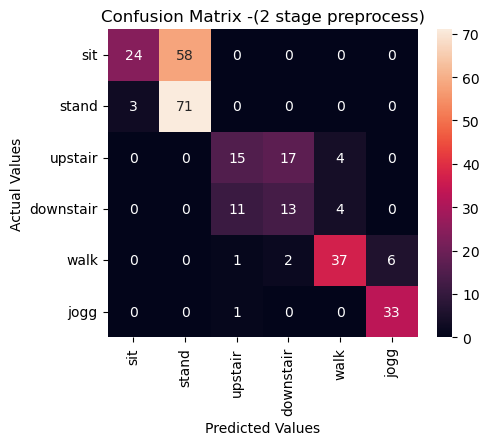

In [211]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
    
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,  index = ['sit','stand','upstair','downstair','walk','jogg'], columns = ['sit','stand','upstair','downstair','walk','jogg'])
# 1.sit 2. stand 3. upstair 4. downstair 5. walk 6. Jogg

#cm_df = pd.DataFrame(cm, index = ['sit & stand','up & down stair','walk','jogg'], columns = ['sit & stand','up & down stair','walk','jogg'])
# 1.2 .sit + stand 3.4 upstair downstair 5. walk 6. Jogg

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix -(2 stage preprocess)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



In [212]:
# Group 4 activity test